# Week-1 Assignment

# **Gotta catch 'em all !**

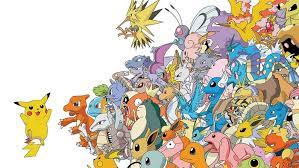

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:
#your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


### 2) Read the csv file and assign it to a variable .

In [2]:
#your code here
data=pd.read_csv("W1_Pokemon.csv")

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [3]:
#your code here
df=pd.DataFrame(data)
print(df.shape)

(800, 13)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [4]:
#your code here
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


### 5) Remove the column '#' and update the dataframe.

In [5]:
#your code here
df.pop('#')
print(df.columns)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


### 6) Set the 'Name' column as the index of dataframe

In [6]:
#your code here
df=df.set_index('Name')

###  7) Print a list of all the unique Type-1 powers

In [7]:
#your code here
print(df['Type 1'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [8]:
#your code here
df['Combo']=df['Type 1'].astype(str)+'+'+df['Type 2'].astype(str)
print(df)
pfcount=df[df['Combo']=='Psychic+Flying'].shape[0]
print(f"No. of psychic and flying is {pfcount}")

                        Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
Name                                                                          
Bulbasaur                Grass  Poison    318  45      49       49       65   
Ivysaur                  Grass  Poison    405  60      62       63       80   
Venusaur                 Grass  Poison    525  80      82       83      100   
VenusaurMega Venusaur    Grass  Poison    625  80     100      123      122   
Charmander                Fire     NaN    309  39      52       43       60   
...                        ...     ...    ...  ..     ...      ...      ...   
Diancie                   Rock   Fairy    600  50     100      150      100   
DiancieMega Diancie       Rock   Fairy    700  50     160      110      160   
HoopaHoopa Confined    Psychic   Ghost    600  80     110       60      150   
HoopaHoopa Unbound     Psychic    Dark    680  80     160       60      170   
Volcanion                 Fire   Water    600  80   

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [9]:
#your code here
megasum = df.index.str.contains('Mega').sum()
print(megasum)


49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [10]:
#your code here
print(df['Sp. Def'].std())

27.82891579711745


### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [12]:
#your code here
print((df['Legendary'].sum()/len(df))*100)

8.125


### 4. Name the pokemon(s) with Maximum Defense.

In [13]:
#your code here
maxdef=df['Defense'].idxmax()
print(maxdef)

SteelixMega Steelix


### 5. Which poison pokemon has the strongest attack ?

In [14]:
#your code here
poison = df.query("`Type 1` == 'Poison' or `Type 2` == 'Poison'") \
           .nlargest(1, 'Attack')
print(poison)


                      Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
Name                                                                        
BeedrillMega Beedrill    Bug  Poison    495  65     150       40       15   

                       Sp. Def  Speed  Generation  Legendary       Combo  
Name                                                                      
BeedrillMega Beedrill       80    145           1      False  Bug+Poison  


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

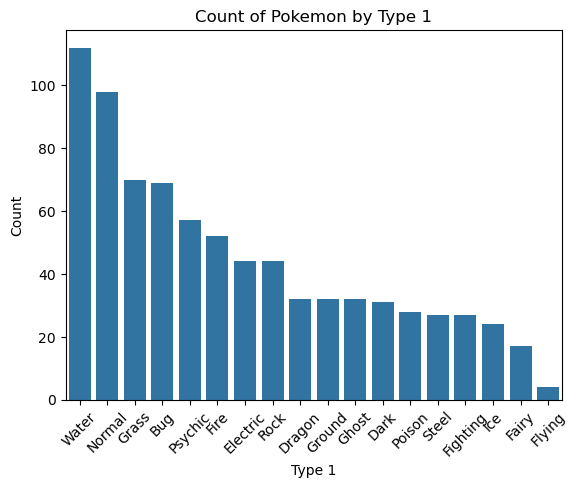

Insight : Most common in Type 1 is Water Type pokemons


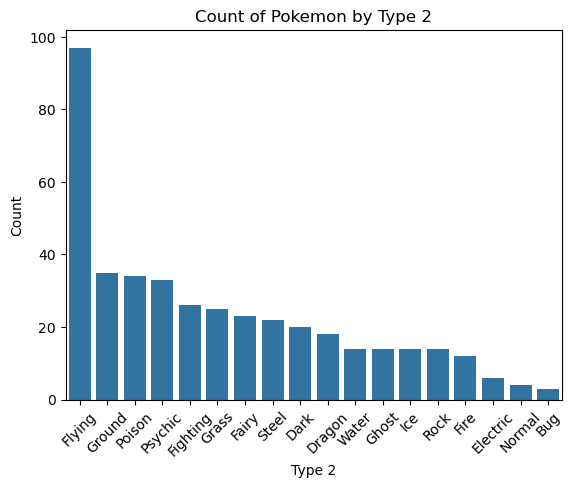

Insight : Most common in Type 2 is FLying Type pokemons


In [21]:
#your code here
sns.countplot(data=df, x='Type 1', order=df['Type 1'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Pokemon by Type 1")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.show()
print("Insight : Most common in Type 1 is Water Type pokemons")
sns.countplot(data=df, x='Type 2', order=df['Type 2'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Pokemon by Type 2")
plt.xlabel("Type 2")
plt.ylabel("Count")
plt.show()
print("Insight : Most common in Type 2 is FLying Type pokemons")

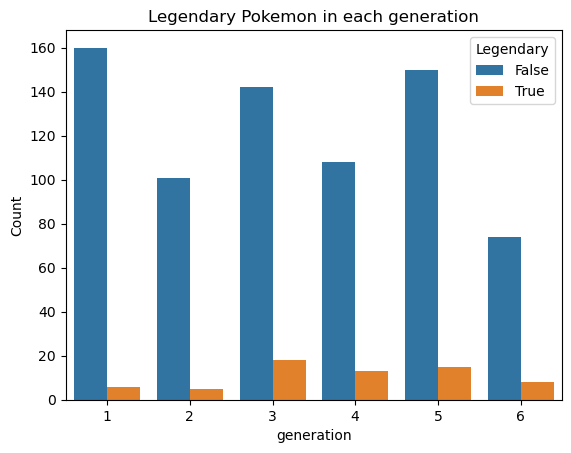

Insight: Most Legendary Pokemons are in Gen1 & Gen3


In [32]:
#your code here
sns.countplot(data=df, x='Generation', hue='Legendary')
plt.title("Legendary Pokemon in each generation")
plt.xlabel("generation")
plt.ylabel("Count")
plt.show()
print("Insight: Most Legendary Pokemons are in Gen1 & Gen3")

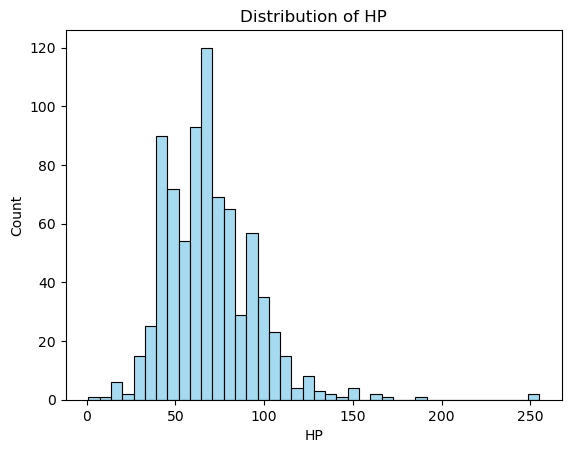

Insight: Most pokemons have a HP between 50-80


In [31]:
#your code here
sns.histplot(df['HP'], color="skyblue")
plt.title("Distribution of HP")
plt.xlabel("HP")
plt.ylabel("Count")
plt.show()
print("Insight: Most pokemons have a HP between 50-80")

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [27]:
#your code here
secondghost = df[(df['Generation'] == 4) & (df['Legendary'] == False) &
              ((df['Type 1'] == 'Ghost') | (df['Type 2'] == 'Ghost'))] \
              .sort_values('Speed', ascending=False)
print(f"Name : {secondghost.iloc[1].name}   Speed: {secondghost.iloc[1]['Speed']}")

Name : Mismagius   Speed: 105


### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [21]:
#your code here
charizard = df.loc['Charizard',['Attack', 'Defense']]
find=df[(df['Legendary'] == False) & 
      (df['Defense']>charizard['Defense']) &
      (df['Attack']<charizard['Attack'])]
print(len(find))

116



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [46]:
#your code here
df['Total']=df['Attack']+df['Sp. Atk']
highest= df['Total'].idxmax()
print(highest)

RayquazaMega Rayquaza


### Which type of legendary pokemons are the most common?

In [30]:
#your code here
legendary_df=df[df['Legendary']==True]
combineddf=pd.concat([legendary_df['Type 1'], legendary_df['Type 2']])
common=combineddf.value_counts().idxmax()
print(f"The most common legendary pokemons are : {common}")

The most common legendary pokemons are : Psychic


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [42]:
#your code here
gen3=df[(df['Generation']==3) & (df['Legendary']==False)]
weakest_gen6=df[(df['Generation']==6) & (df['Legendary']==True)].sort_values('HP', ascending = True).iloc[0]
higherhp=gen3[gen3['HP'] > weakest_gen6['HP']]
print(len(higherhp))

95


### Print out the third slowest pokemon(s) in the dataset.

In [45]:
#your code here
thirdslowest=df.sort_values('Speed', ascending=True).iloc[2]
print(thirdslowest.name)

Ferroseed


### Which pokemon type has the highest average HP?

In [58]:
#your code here
avg_hp = df.groupby('Type 1')['HP'].mean()
top_type = avg_hp.idxmax()
value1=avg_hp.max()
avg_hp2 = df.groupby('Type 2')['HP'].mean()
top_type2 = avg_hp2.idxmax()
value2=avg_hp2.max()
if(value1>value2):
    print(top_type)
elif (value1==value2):
    print(f"Top types are: {top_type} and {top_type2}")
else:
    print(top_type2)

Ice
